http://scikit-image.org/docs/dev/auto_examples/plot_gabors_from_astronaut.html

In [12]:
import numpy as np
from scipy.cluster.vq import kmeans2
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage.util.shape import view_as_windows
from skimage.util.montage import montage2d

In [13]:
%matplotlib inline

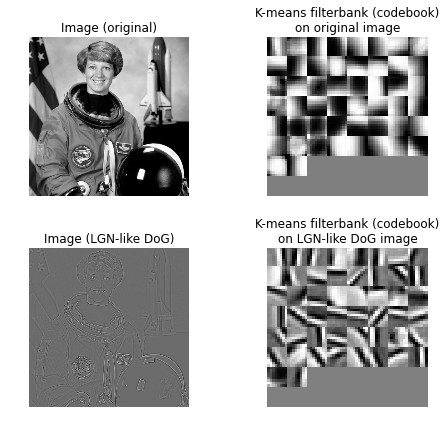

In [37]:
np.random.seed(42)

patch_shape = 8, 8
n_filters = 50

astro = color.rgb2gray(data.astronaut())

# -- filterbank1 on original image
patches1 = view_as_windows(astro, patch_shape)
patches1 = patches1.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb1, _ = kmeans2(patches1, n_filters, minit='points')
fb1 = fb1.reshape((-1,) + patch_shape)
fb1_montage = montage2d(fb1, rescale_intensity=True)

# -- filterbank2 LGN-like image
astro_dog = ndi.gaussian_filter(astro, .5) - ndi.gaussian_filter(astro, 1)
patches2 = view_as_windows(astro_dog, patch_shape)
patches2 = patches2.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb2, _ = kmeans2(patches2, n_filters, minit='points')
fb2 = fb2.reshape((-1,) + patch_shape)
fb2_montage = montage2d(fb2, rescale_intensity=True)

# --
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax = axes.ravel()

ax[0].imshow(astro, cmap=plt.cm.gray)
ax[0].set_title("Image (original)")

ax[1].imshow(fb1_montage, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title("K-means filterbank (codebook)\non original image")

ax[2].imshow(astro_dog, cmap=plt.cm.gray)
ax[2].set_title("Image (LGN-like DoG)")

ax[3].imshow(fb2_montage, cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title("K-means filterbank (codebook)\non LGN-like DoG image")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()
plt.show()

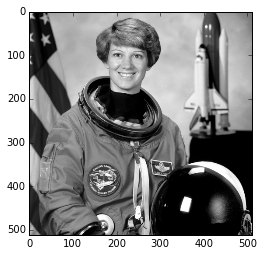

In [38]:
plt.imshow(astro,cmap=plt.cm.gray)

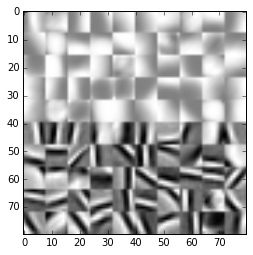

In [41]:
fb=np.zeros((n_filters*2,patch_shape[0],patch_shape[1]))
fb[:n_filters]=fb1
fb[n_filters:]=fb2
plt.imshow(montage2d(fb, rescale_intensity=True),cmap=plt.cm.gray)

In [17]:
astro.shape

(512L, 512L)

In [18]:
patches1.shape

(31879L, 64L)

In [19]:
fb1.shape

(49L, 8L, 8L)